# Monday, February 17th

Last time, we saw how to use `matplotlib` to create plots. As an example, let's plot $y=\sin(x)$ and $y=\cos(x)$ for $0 \leq x \leq 2\pi$.

In [1]:
import matplotlib.pyplot as plt

First, let's generate a list of $x$-values that we will use for plotting. Let's use `N=1000` data points.

In [2]:
from math import pi

x_list = []

a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 1000   # Number of sub-intervals to divide (a,b) into

dx = (b - a)/N   # Width of each sub-interval

for i in range(N+1):
    x = a + i*dx
    x_list.append(x)

Now, we want to plug each one of these $x$-values into the $\sin$ and $\cos$ functions:

In [3]:
from math import sin, cos

sin_x_list = []
cos_x_list = []

for x in x_list:
    sin_x_list.append(sin(x))
    cos_x_list.append(cos(x))

Now plot:

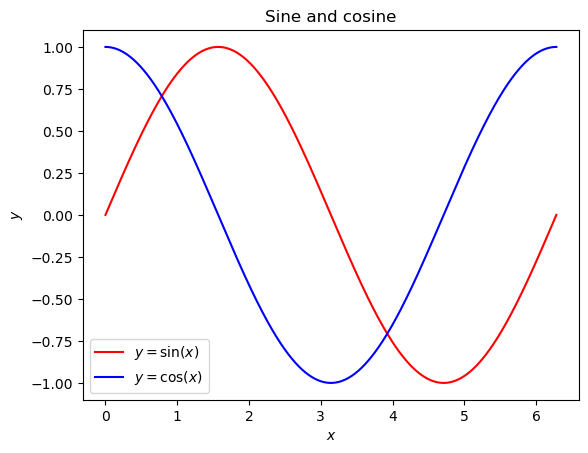

In [4]:
plt.plot(x_list, sin_x_list, 'r-', label='$y=\sin(x)$')
plt.plot(x_list, cos_x_list, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

**Exercise:** Rewrite the cells above to use list comprehensions instead `for` loops to generate `x_list`, `sin_x_list`, `cos_x_list`.

In [5]:
from math import pi, sin, cos

a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 1000   # Number of sub-intervals to divide (a,b) into
dx = (b - a)/N   # Width of each sub-interval

x_list = [a + i*dx for i in range(N+1)]
sin_x_list = [sin(x) for x in x_list]
cos_x_list = [cos(x) for x in x_list]

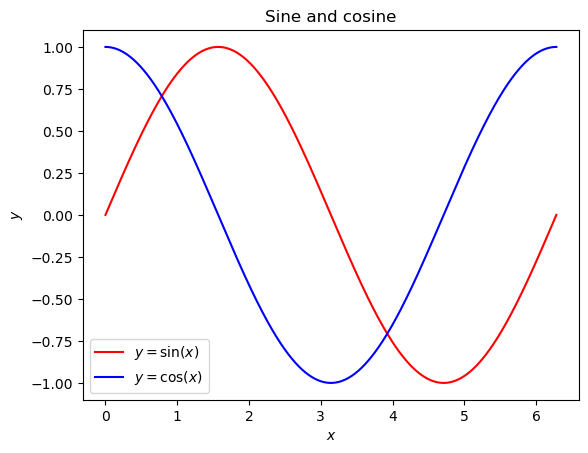

In [6]:
plt.plot(x_list, sin_x_list, 'r-', label='$y=\sin(x)$')
plt.plot(x_list, cos_x_list, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

Some thoughts:
 - It would be nice to be able to easily generate things like `x_list`, where we take evenly spaced points spanning an interval
 - It would be nice if we could easily apply a function to a list of data points (i.e. something like `sin(x_list)`).

In [7]:
sin(x_list)

TypeError: must be real number, not list

## NumPy

The NumPy module contains many useful tools for numerical calculations in Python.

In [15]:
import numpy as np

The basic building blocks from NumPy are **arrays**, which in many ways behave like lists. We can define an array using `np.array`:

In [16]:
my_array = np.array([1,2,3,4,5,6])
my_list = [1,2,3,4,5,6]

In [17]:
type(my_list)

list

In [18]:
type(my_array)

numpy.ndarray

We access elements and slices of arrays just like lists:

In [19]:
my_array[3]

np.int64(4)

In [20]:
my_array[-1]

np.int64(6)

In [21]:
my_array[1:5]

array([2, 3, 4, 5])

However, NumPy arrays behave very differently than lists with arithmetic operations:

In [22]:
my_list * 3

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

In [23]:
my_array * 3

array([ 3,  6,  9, 12, 15, 18])

We see that:
 - Multiplying a list by an integer concatenates the list by the integer number of times
 - Multiplying an array a number multiples each element of the array by that number

In general, arithmetic operations on arrays are done element-wise.

In [24]:
my_array + 4

array([ 5,  6,  7,  8,  9, 10])

In [25]:
my_array % 2

array([1, 0, 1, 0, 1, 0])

In [26]:
my_array ** 3

array([  1,   8,  27,  64, 125, 216])

In [27]:
3 ** my_array

array([  3,   9,  27,  81, 243, 729])

Can we take the `sin` and `cos` of arrays?

In [28]:
sin(my_array)

TypeError: only length-1 arrays can be converted to Python scalars

Note: We imported the `sin` and `cos` functions from the `math` module, but they are not designed to work with arrays. Instead, we can either import `sin` and `cos` from the `numpy` module, or we can use `np.sin` and `np.cos`.

In [29]:
np.sin(my_array)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ])

What about generating arrays of evenly spaced points? We can use the `np.linspace`:

In [30]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `end

Repeating our first exercise now with arrays:

In [31]:
a = 0
b = 2*pi
N = 1000

x_array = np.linspace(a,b,N+1)
sin_x_array = np.sin(x_array)
cos_x_array = np.cos(x_array)

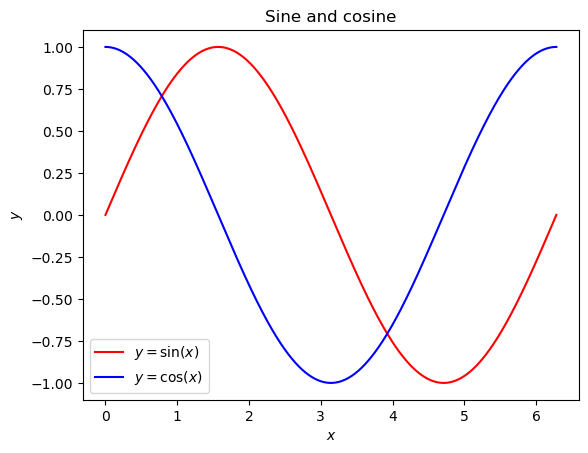

In [32]:
plt.plot(x_array, sin_x_array, 'r-', label='$y=\sin(x)$')
plt.plot(x_array, cos_x_array, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

Let's compare evaluation times between `for` loops, list comprehensions, and `numpy` arrays:

In [33]:
from time import time

In [34]:
a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 10**6

In [35]:
t0 = time()

x_list = []
dx = (b - a)/N   # Width of each sub-interval

for i in range(N+1):
    x = a + i*dx
    x_list.append(x)
    
sin_x_list = []
cos_x_list = []

for x in x_list:
    sin_x_list.append(sin(x))
    cos_x_list.append(cos(x))
    
t1 = time()

print(t1 - t0)

0.5778906345367432


In [36]:
t0 = time()

dx = (b - a)/N   # Width of each sub-interval
x_list = [a + i*dx for i in range(N+1)]
    
sin_x_list = [sin(x) for x in x_list]
cos_x_list = [cos(x) for x in x_list]
    
t1 = time()

print(t1 - t0)

0.3305196762084961


In [37]:
t0 = time()

x_array = np.linspace(a,b,N+1)
    
sin_x_array = np.sin(x_array)
cos_x_list = np.cos(x_array)
    
t1 = time()

print(t1 - t0)

0.028186321258544922


## How to generate arrays in NumPy

We've seen that we can use `np.array` to convert lists to arrays and `np.linspace` to generate arrays of equally spaced points. Some other options:
 - `np.zeros` can generate arrays full of zeros
 - `np.ones` can generate arrays full of 1s
 - `np.arange` works just like the normal `range` function, except that it returns an array instead

In [38]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [39]:
np.ones(7)

array([1., 1., 1., 1., 1., 1., 1.])

In [40]:
np.arange(2,10,3)

array([2, 5, 8])

Notice: the `np.zeros` function and `np.ones` function produce arrays filled with floats, while the `np.arange` function returns an array full of integers.

In general, unlike lists, NumPy arrays can only be filled with one datatype. You can check what datatype an array holds using the `.dtype` attribute:

In [41]:
my_array = np.zeros(5)
print(my_array.dtype)

float64


In [42]:
my_array = np.arange(5)
print(my_array.dtype)

int64


You can change the datatype when defining arrays using `np.zeros` or `np.ones` by using the `dtype` keyword argument:

In [43]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

In [44]:
np.zeros(10, dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False])

In [45]:
np.ones(10, dtype=bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Slicing with NumPy

Like with lists, we can take slices of NumPy arrays:

In [46]:
N = 50

my_list = [i for i in range(N)]
my_array = np.arange(N)

In [47]:
list_slice = my_list[1::2]
array_slice = my_array[1::2]

In [48]:
print(list_slice)
print(array_slice)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


What happens if we modify these slices?

In [49]:
list_slice[0] = 99
print('Modified slice:')
print(list_slice)
print('List:')
print(my_list)

Modified slice:
[99, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
List:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [50]:
array_slice[0] = 99
print('Modified slice:')
print(array_slice)
print('Array:')
print(my_array)

Modified slice:
[99  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]
Array:
[ 0 99  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


Observations:
 - List slices produce new lists unattached to the original. Changes to the list slice do not affect the original list.
 - Array slices provide "views" of the original array. Changes to the slice propogate back to the original array.

## Project 2: Pythagorean triples

In [51]:
ptriples = [[3, 4, 5],
[4, 3, 5],
[5, 12, 13],
[6, 8, 10],
[8, 6, 10],
[8, 15, 17],
[9, 12, 15],
[12, 5, 13],
[12, 9, 15],
[12, 16, 20],
[15, 8, 17],
[15, 20, 25],
[16, 12, 20],
[20, 15, 25]]

How can we plot the $(a,b)$ pairs from our Pythagorean triples?

In [52]:
a_list = []
b_list = []
c_list = []

for ptriple in ptriples:
    a_list.append(ptriple[0])
    b_list.append(ptriple[1])
    c_list.append(ptriple[2])

Text(0.5, 1.0, 'Pythagorean tuples $(a,b)$')

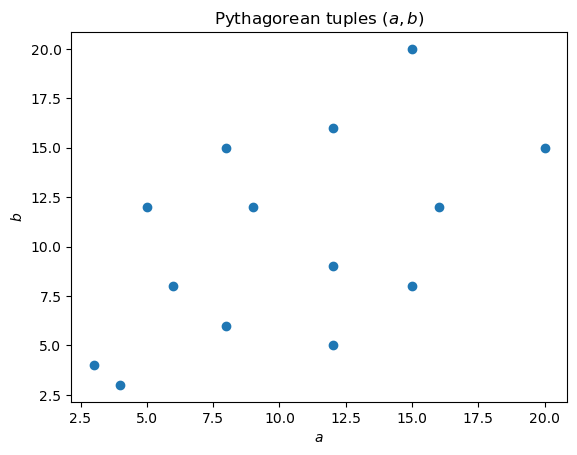

In [53]:
plt.plot(a_list, b_list, 'o')
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.title('Pythagorean tuples $(a,b)$')

# Wednesday, February 19th

Recall: For project 1, we wrote a function `get_primes` that generated a list of all primes less than or equal to the input.

In [54]:
# Import the square root function
from math import sqrt

def is_prime(n):
    # Check for divisors between 2 and sqrt(n)
    for d in range(2,int(sqrt(n))+1):
        # Check if d divides n
        if n % d == 0:
            return False
    return True

In [55]:
def get_primes(N):
    # Initialize an empty list of twin primes
    primes = []
    
    # Check if n is prime for n = 2, 3, ..., N-1 
    for n in range(2,N):
        if is_prime(n):
            # If n is prime, add it to the list
            primes.append(n)
    
    return primes

This `get_primes` function worked by sequentially testing whether each integer was prime.

**Exercise:** Write a new `get_primes` function that utilizes the Sieve of Eratosthenes.

Description of the method:
 - Start with the first prime number 2
 - Eliminate all multiples of 2 (aside from 2 itself)
 - Take the next number still in our list, which must be prime
 - Eliminate all multiples of the prime (aside from itself)
 - Repeat from Step 3

Hint: It might be helpful to build a list of Boolean values, such that the `i`th element of the list is `True` if the number `i` is prime, and `False` otherwise.

We can then "eliminate" multiples of a prime by setting their values to `False`.

It may also be helpful to use the `continue` command, which will end an iteration early and proceed to the next iteration of a loop.

In [56]:
def get_primes_with_sieve(N):
    # Construct a list that will ultimate contain
    # True in the ith position if i is a prime number
    # and False otherwise
    # Initialize all values to True until we can show
    # that a number is not prime
    is_prime_bools = [True for n in range(N+1)]
    
    # Set 0 and 1 to be not prime
    is_prime_bools[0] = False
    is_prime_bools[1] = False
    
    for p in range(2,N+1):
        # if p is known to not be prime, skip it
        if not is_prime_bools[p]:
            continue
        
        # otherwise, eliminate all multiples of p
        for n in range(2*p, N+1, p):
            is_prime_bools[n] = False
        
    # Construct the list of primes based on is_prime_bools
    primes = [p for p in range(N+1) if is_prime_bools[p]]
    
    return primes

In [57]:
get_primes_with_sieve(15)

[2, 3, 5, 7, 11, 13]

Let's compare the runtime of these two algorithms:

In [58]:
from time import time

In [59]:
N = 1000000

t0 = time()
primes = get_primes(N)
t1 = time()
print(t1-t0)

t0 = time()
primes = get_primes_with_sieve(N)
t1 = time()
print(t1-t0)

3.9779245853424072
0.2741882801055908


**Exercise:** Rewrite the sieve function to make use of NumPy slicing.

In [60]:
def get_primes_with_numpy_sieve(N):
    # Construct a list that will ultimate contain
    # True in the ith position if i is a prime number
    # and False otherwise
    # Initialize all values to True until we can show
    # that a number is not prime
    is_prime_bools = np.ones(N+1,dtype=bool)
    
    # Set 0 and 1 to be not prime
    is_prime_bools[0] = False
    is_prime_bools[1] = False
    
    for p in range(2,N+1):
        # if p is known to not be prime, skip it
        if not is_prime_bools[p]:
            continue
        
        # otherwise, eliminate all multiples of p
        is_prime_bools[2*p::p] = False
        
    # Construct the list of primes based on is_prime_bools
    primes = [p for p in range(N+1) if is_prime_bools[p]]
    
    return primes

In [61]:
N = 1000000

t0 = time()
primes = get_primes(N)
t1 = time()
print(t1-t0)

t0 = time()
primes = get_primes_with_sieve(N)
t1 = time()
print(t1-t0)

t0 = time()
primes = get_primes_with_numpy_sieve(N)
t1 = time()
print(t1-t0)

4.207724571228027
0.2390739917755127
0.1690659523010254


## Back to Project 2: Pythagorean triples

It will be useful for the project to consider what are called, "primitive Pythagorean triples". We say that a Pythagorean triple $(a,b,c)$ is **primitive** if the greatest common divisor of $a$, $b$, and $c$ is $1$.

**Math exercise:** A Pythagorean triple $(a,b,c)$ is primitive if and only if the greatest common divisor of $a$ and $b$ is $1$.

We will call a Pythogrean tuple $(a,b)$ **primitive** if $a$ and $b$ have greatest common divisor $1$. It will be useful for the project to also plot only the primitive Pythagorean tuples.

To that end, can we calculated greatest common divisors? Let's write our own `greatest_common_divisor` function:

In [62]:
def greatest_common_divisor(a,b):
    gcd = 1
    for d in range(1,min(a,b)+1):
        if (a % d == 0) and (b % d == 0):
            gcd = d
    return gcd

In [63]:
greatest_common_divisor(15,6)

3

Another way of calculating greatest common divisors is called "the Euclidean algorithm." The algorithm works as follows:
 - Start with integers $a$ and $b$, and assume that $a \leq b$
 - Subtract the smaller $a$ from the larger $b$, and replace the larger $b$ with the difference $b - a$
 - Repeat step 2 until one of the numbers is $0$. The other will be the greatest common divisor

**Exercise:** Write a function to implement the Euclidean algorithm

In [64]:
def Euclidean_algorithm(a,b):
    while True:
        # First, make sure that a <= b
        if a > b:
            a,b = b,a
            
        # Replace b with b - a
        b = b - a
        
        # If one of the numbers is zero, stop
        if a == 0 or b == 0:
            break
    # The non-zero number is the GCD
    return max(a,b)

In [65]:
Euclidean_algorithm(18,12)

6

We can apply some thought the make this significantly faster:

In [66]:
def Euclidean_algorithm(a,b):
    # First, make sure that a <= b
    if a > b:
        a,b = b,a
        
    while True:
        # Subtract as many multiples of a as we can
        a, b = b % a, a
        
        # If one of the numbers is zero, stop
        if a == 0:
            break
    # The non-zero number is the GCD
    return b

In [67]:
a = 100000000
b = a//2 + 2

t0 = time()
gcd = greatest_common_divisor(a,b)
t1 = time()
print(t1 - t0)

t0 = time()
gcd = Euclidean_algorithm(a,b)
t1 = time()
print(t1 - t0)

3.229478359222412
0.0


How can we construct primitive triples?

In [68]:
ptriples = [[3, 4, 5],
[4, 3, 5],
[5, 12, 13],
[6, 8, 10],
[8, 6, 10],
[8, 15, 17],
[9, 12, 15],
[12, 5, 13],
[12, 9, 15],
[12, 16, 20],
[15, 8, 17],
[15, 20, 25],
[16, 12, 20],
[20, 15, 25]]

In [69]:
def is_primitive_triple(ptriple):
    if Euclidean_algorithm(ptriple[0], ptriple[1]) == 1:
        return True
    else:
        return False

In [70]:
prim_ptriples = [ptriple for ptriple in ptriples if is_primitive_triple(ptriple)]
print(prim_ptriples)

[[3, 4, 5], [4, 3, 5], [5, 12, 13], [8, 15, 17], [12, 5, 13], [15, 8, 17]]


## List unpacking

It is often the case that we have some list (or other iterable) of elements which we want to sequentially assign to different variable names.

In [71]:
my_list = ['Justin', 'Emily', 'Steven', 'Jonathan']

first = my_list[0]
second = my_list[1]
third = my_list[2]
fourth = my_list[3]

print(first)
print(third)

Justin
Steven


There's a shorthand for performing this unpacking by using comma-separated variable names:

In [72]:
first, second, third, fourth = my_list
print(first)
print(third)

Justin
Steven


This can be very useful when combined with list comprehension, particular for our Pythagorean triples project:

In [73]:
for ptriple in ptriples:
    print(ptriple[0])

3
4
5
6
8
8
9
12
12
12
15
15
16
20


In [74]:
for (a,b,c) in ptriples:
    print(a)

3
4
5
6
8
8
9
12
12
12
15
15
16
20
